In [2]:
import os
import sys

# Determine the path to the directory containing your notebook
notebook_dir = os.path.dirname(os.path.abspath(__file__ if '__file__' in globals() else sys.argv[0]))

# Traverse up the directory hierarchy to get to the "quant_finance_books" directory
quant_finance_books_dir = notebook_dir
while os.path.basename(quant_finance_books_dir) != "quant_finance_books":
    quant_finance_books_dir = os.path.dirname(quant_finance_books_dir)

# Add "quant_finance_books_dir" to the Python path
sys.path.append(quant_finance_books_dir)

In [5]:
import numpy as np
import scipy as sp
from scipy.integrate import dblquad
import scipy.integrate as integrate
from scipy.integrate import simps
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator
from qf_functions import brownian_paths

# Chapter 1 - Brownian Motion

## Theory

### 1.7.1 Successive Brownian Motion Increments

The probability function of a Brownian Increment was specified as:
$$f[u, w] = \frac{1}{\sqrt{u} \sqrt{2 \pi}} \exp\left(-\frac{1}{2}\left(\frac{w}{\sqrt{u}}\right)^2\right)$$

And the joint probability as:
$$
P[B(t_1) \leq a_1, B(t_2) \leq a_2] =
\int_{-\infty}^{a_1} \int_{-\infty}^{a_2} \frac{1}{\sqrt{t_1} \sqrt{2\pi}} \exp\left(-\frac{1}{2}\frac{(x_1 - 0)^2}{t_1}\right) \cdot \frac{1}{\sqrt{t_2 - t_1} \sqrt{2\pi}} \exp\left(-\frac{1}{2}\frac{(x_2 - x_1)^2}{\sqrt{t_2 - t_1}}\right) \, dx_1 \, dx_2
$$

Lets calculate the average of an increment, we need to add the term (x2-x1) to the joint probability.

In [2]:

# Define the function f(u, w)
def f(u, w):
    return (1 / (np.sqrt(u) * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (w / np.sqrt(u))**2)

# Define the mean_join_prob function
def mean_join_prob(x2, x1, u1, u2):
    return (x2 - x1) * f(u1, x1) * f(u2, x2 - x1)

# Define the integration limits
x1_limits = (-10, 10)
x2_limits = (-10, 10)

# Specify a range of uNow values
uNow_values = np.linspace(0.1, 10.0, 10)  # Adjust the range and number of values as needed

# Perform the double integral for each uNow value
results = []
for uNow in uNow_values:
    result, _ = dblquad(mean_join_prob, x1_limits[0], x1_limits[1], lambda x: x2_limits[0], lambda x: x2_limits[1], args=(1,uNow,))
    results.append(result)

# The results list now contains the integration results for each uNow value
print(results)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [3]:

# Define the function f(u, w)
def f(u, w):
    return (1 / (np.sqrt(u) * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (w / np.sqrt(u))**2)

# Define the integrand function
def var_join_prob(x2, x1, u1,u2):
    return (x2 - x1)**2 * f(u1, x1) * f(u2, x2 - x1)

# Define the integration limits
x1_limits = (-20, 20)
x2_limits = (-20, 20)

# Specify a range of uNow values
uNow_values = np.linspace(0.1, 10.0, 10)  # Adjust the range and number of values as needed

# Perform the double integral for each uNow value
results = []
for uNow in uNow_values:
    result, _ = dblquad(var_join_prob, x1_limits[0], x1_limits[1], lambda x: x2_limits[0], lambda x: x2_limits[1], args=(1,uNow,))
    results.append(round(result,2))

# The results list now contains the integration results for each uNow value
print(results)
print(uNow_values)

[0.1, 1.2, 2.3, 3.4, 4.5, 5.6, 6.7, 7.8, 8.9, 10.0]
[ 0.1  1.2  2.3  3.4  4.5  5.6  6.7  7.8  8.9 10. ]


#### Example 3.1

This example (based on Klebaner example 3.1) gives
the computation of P[B(1) ≤ 0, B(2) ≤ 0]. It is the probability that
both the position at time 1 and the position at time 2 are not positive.
The position at all other times does not matter.

In [83]:

# Define the function f(u, w)
def f(x, sig):
    return (1 / (np.sqrt(sig) * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (x / np.sqrt(sig))**2) 

# Define the integrand function
def join_prob(x2, x1, u1, u2):
    return  f(x1, u1) * f(x2 - x1, u2)

# Define the integration limits
x1_limits = (-20, 0)
x2_limits = (-20, 0)

#Define time instants
uNow1 = 1
uNow2 = 2

result, _ = dblquad(join_prob, x1_limits[0], x1_limits[1], lambda x: x2_limits[0], lambda x: x2_limits[1], args=(uNow1,uNow2,))

# The results list now contains the integration results for each uNow value
print(result)

0.3479566380076519


(24,) (24, 24) (24, 24)


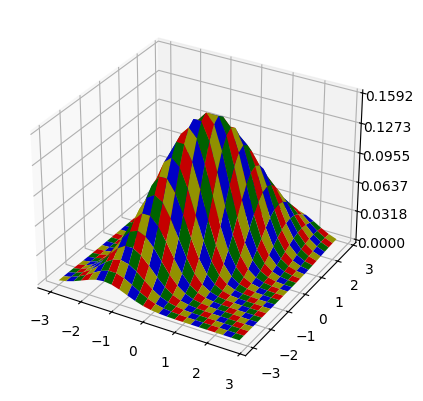

In [84]:


ax = plt.figure().add_subplot(projection='3d')

# Make data.
X1 = np.arange(-3, 3, 0.25)
xlen = len(X1)
Y1 = np.arange(-3, 3, 0.25)
ylen = len(Y1)
X, Y = np.meshgrid(X1, Y1)
R = np.sqrt(X**2 + Y**2)
Z = join_prob(Y,X,1,1)

# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
colortuple = ('y', 'b', "g", "r")
colors = np.empty(X.shape, dtype=str)
for y in range(ylen):
    for x in range(xlen):
        colors[y, x] = colortuple[(x + y) % len(colortuple)]

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(6))
print(X1.shape,Y.shape, Z.shape)
plt.show()

### 1.8.1 Simulación del movimiento Browniano

Se divide la linea temporal en N intervalos de longitud $\Delta t = 1/N$, y simulamos para cada instante una variable aleatoria normal con desviación $\sqrt{\Delta t}$



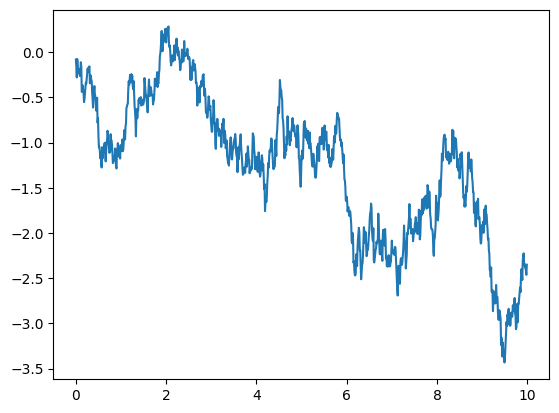

In [46]:
# We define the principal parameters of this brownian motion
t0 = 0; T = 10; N = 1000; delta_t = (T-t0)/N; 

# An array for all the time steps
time_steps = np.arange(t0,T,delta_t)

# An array for all increments
delta_B = np.random.normal(0, np.sqrt(delta_t), N)

# The sum of the increments is the Brownian Motion
b_t = np.cumsum(delta_B)

plt.plot(time_steps,b_t)

### Caminos Brownianos correlados

En el caso de que quisieramos simular caminos brownianos correlados, para el caso de dos caminos podemos usar un movimiento browniano intermedio de manera que si $B(t),B'(t)$ son dos caminos brownianos indepentientes:
$$
B^*(t) = \rho B(t) + \sqrt{1-\rho}B'(t)
$$

Tendrá correlación $\rho$ con $B(t)$ (ver 1.6 ubbo).

[[1.         0.96349709]
 [0.96349709 1.        ]]


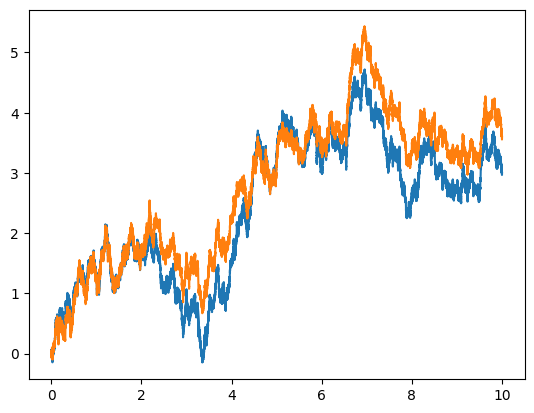

In [45]:
# We define the principal parameters of this brownian motion
t0 = 0
T = 10
N = 100000
delta_t = (T-t0)/N
ro=0.9

# An array for all the time steps
time_steps = np.arange(t0,T,delta_t)

# 2 Brownian motions
delta_B1 = np.random.normal(0, np.sqrt(delta_t), N)
b1_t = np.cumsum(delta_B1)
delta_B2 = np.random.normal(0, np.sqrt(delta_t), N)
b2_t = np.cumsum(delta_B2)

b3_t = ro*b1_t + np.sqrt(1-ro)*b2_t

plt.plot(time_steps,b1_t)
plt.plot(time_steps,b3_t)

print(np.corrcoef(b1_t,b3_t))

Otra forma sería a través de incrementos correlados directamente.

In [ ]:
m[:,1].shape

(1000,)

[[1.         0.90379767]
 [0.90379767 1.        ]]


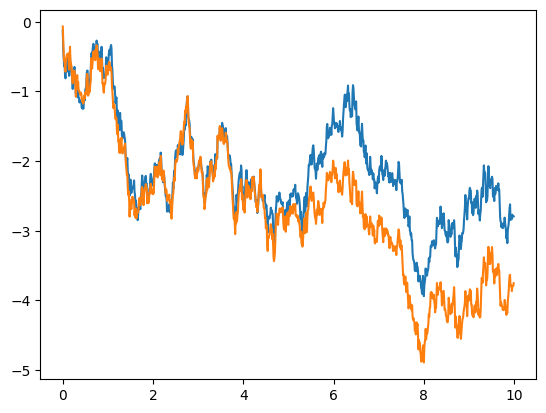

In [ ]:
# We define the principal parameters of this brownian motion
t0 = 0
T = 10
N = 1000
delta_t = (T-t0)/N
ro=0.9

# An array for all the time steps
time_steps = np.arange(t0,T,delta_t)

# Correlated increments
m = np.random.multivariate_normal([0,0],[[delta_t, delta_t*ro],[delta_t*ro, delta_t]], N)

# Calculate brownian paths
b1_t = np.cumsum(m[:,0])
b2_t = np.cumsum(m[:,1])

plt.plot(time_steps,b1_t)
plt.plot(time_steps,b2_t)

print(np.corrcoef(b1_t,b2_t))

En la práctica necesitaremos simular un número $n>2$ de caminos brownianos correlados sobre los que tendremos una matriz de Covarianzas. Para ello usaremos la descomposición de cholesky del la matriz de covarianzas (https://math.stackexchange.com/questions/446093/generate-correlated-normal-random-variables).

If you need to generate n
 correlated Gaussian distributed random variables
Y∼N(μ,Σ)
where Y=(Y1,…,Yn)
 is the vector you want to simulate, μ=(μ1,…,μn)
 the vector of means and Σ
 the given covariance matrix,

you first need to simulate a vector of uncorrelated Gaussian random variables, Z
then find a square root of Σ
, i.e. a matrix C
 such that CC⊺=Σ
.
Your target vector is given by
Y=μ+CZ.
A popular choice to calculate C
 is the Cholesky decomposition.


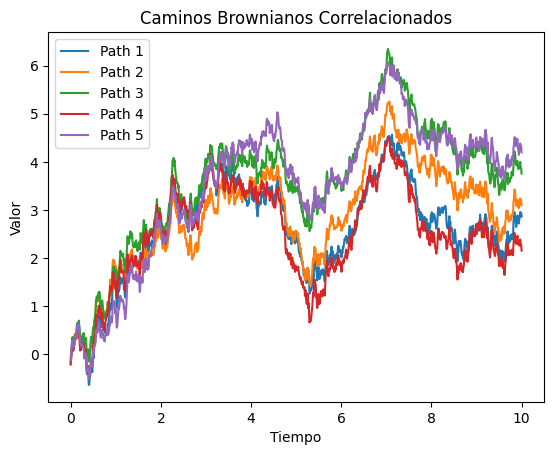

Matriz de correlación:
[[1.         0.89833909 0.89394565 0.97413729 0.85772719]
 [0.89833909 1.         0.97744098 0.85237212 0.94854671]
 [0.89394565 0.97744098 1.         0.82201597 0.97460459]
 [0.97413729 0.85237212 0.82201597 1.         0.77267457]
 [0.85772719 0.94854671 0.97460459 0.77267457 1.        ]]


In [ ]:
# Parámetros
t0 = 0
T = 10
N = 1000
n = 5  # Número de caminos Brownianos
delta_t = (T - t0) / N
ro = 0.9

# Matriz de covarianza simétrica
cov_matrix = np.identity(n) * delta_t  # Matriz diagonal con delta_t
cov_matrix[cov_matrix != delta_t] = delta_t * ro  # Establecer las correlaciones

# Generar variables normales independientes
random_increments = np.random.randn(N, n)

# Aplicar la descomposición de Cholesky
chol_decomp = np.linalg.cholesky(cov_matrix)

# Generar incrementos correlacionados
correlated_increments = np.dot(random_increments, chol_decomp.T)

# Calcular los caminos Brownianos
brownian_paths = np.cumsum(correlated_increments, axis=0)

# Crear un array para los pasos de tiempo
time_steps = np.linspace(t0, T, N)

# Plotea los caminos Brownianos
for i in range(n):
    plt.plot(time_steps, brownian_paths[:, i], label=f'Path {i+1}')

plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Caminos Brownianos Correlacionados')
plt.show()

# Calcula la matriz de correlación
correlation_matrix = np.corrcoef(brownian_paths, rowvar=False)
print("Matriz de correlación:")
print(correlation_matrix)

## Exercises

### Exercise 1.9.6
Brownian motion through gates Consider a Brownian motion
path that passes through two gates situated at times t1 and t2.

(a) Derive the expected value of B(t1) of all paths that pass
through gate 1.

(b) Derive the expected value of B(t2) of all paths that pass
through gate 1 and gate 2.

(c) Derive an expression for the expected value of the increment
over time interval [t1, t2] for paths that pass through
both gates.

(d) Design a simulation program for Brownian motion
through gates, and verify the answers to (a), (b), and (c)
by simulation.

#### a)

In [50]:
# Define the function f that you want to integrate, with the parameter sig
def f(x, sig):
    return (1 / (np.sqrt(sig) * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (x / np.sqrt(sig))**2) 

# Define a function called gate to calculate the integral of f over the interval [a, b]
# It also takes the sig parameter to pass to the f function
def gate(a, b, f, sig):
    # Use integrate.quad to calculate the integral of f over the interval [a, b]
    # The result is a tuple with two elements: the value of the integral and the estimated error
    result, error = integrate.quad(f, a, b, args=(sig,))
    return result

# Define the values of a, b, and sig that you want to use
a = 1
b = 2
t1 = 2

# Calculate the integral by calling the gate function
integral_result = gate(a, b, f, t1)

# Print the result of the integral
print("The result of the integral is:", integral_result)


The result of the integral is: 0.1611004575683342


#### b)

In [85]:
# Define the values that you want to use
a = 1
b = 2
t1 = 1
c = 0
d = 2
t2 = 2

# Define the join_prob function
def join_prob(x1, x2, u1,u2):
    return f(x1, u1) * f(x2 - x1, u2)

# Define a function to calculate the integral of join_prob
def paths_through_abcd(a, b, c, d, u1, u2):
    integral_result, error = integrate.nquad(join_prob, [[a, b], [c, d]], args=(u1, u2))
    return integral_result, error

# Calculate the integral by calling the calculate_integral function
integral_result, error = paths_through_abcd(a, b, c, d, t1, t2-t1)

# Print the result of the integral
print("The result of the integral is:", integral_result, " with estimated error: ", error)

The result of the integral is: 0.08613556091390191  with estimated error:  9.562968296561659e-16


#### c)

In [88]:
# Define the values that you want to use
a = 1
b = 2
t1 = 1
c = 0
d = 2
t2 = 2

# Define the join_prob function
def join_prob_increment(x2, x1, u1,u2):
    return (x2-x1)*f(x1, u1) * f(x2 - x1, u2)

# Define a function to calculate the integral of join_prob
def increment_through_abcd(a, b, c, d, u1, u2):
    integral_result, error = integrate.nquad(join_prob_increment, [[c, d], [a, b]], args=(u1, u2))
    return integral_result

# Calculate the integral by calling the calculate_integral function
integral_result = increment_through_abcd(a, b, c, d, t1, t2-t1)

# Print the result of the integral
print("The result of the integral is:", integral_result)

The result of the integral is: -0.022199565962666156


#### d)

In [89]:
# Define the parameters
t0 = 0
T = 2
N = 1000
n = 200000
delta_t = (T - t0) / N

# Generate the time steps
time_steps = np.arange(t0, T, delta_t)

# Generate the increments
delta_B = np.random.normal(0, np.sqrt(delta_t), (n,N))

# Calculate the Brownian Motion
b_t = np.cumsum(delta_B, axis=1)

# Define the range [a, b] for which you want to calculate the percentage
a = 1 # Replace with your desired 'a' value
b = 2 # Replace with your desired 'b' value

# Calculate the percentage of values in b_t that are between a and b
percentage_between_a_and_b = np.sum((b_t[:,N-1] >= a) & (b_t[:,N-1] <= b)) / n * 100

print(f"Percentage of values between {a} and {b}: {percentage_between_a_and_b:.2f}%")

# Define the range [c, d] for which you want to calculate the percentage
c=0
d=2
# Calculate the percentage of values in b_t that are between a and b in and  c and d
percentage_between_a_and_b_and_c_and_d = np.sum((b_t[:,N-1] >= c) & (b_t[:,N-1] <= d) & (b_t[:,int(N/2-1)] >= a) & (b_t[:,int(N/2-1)] <= b)) / n * 100

print(f"Percentage of values between {a} and {b} and after {c} and {d}: {percentage_between_a_and_b_and_c_and_d:.2f}%")


Percentage of values between 1 and 2: 16.07%
Percentage of values between 1 and 2 and after 0 and 2: 8.59%


In [90]:
# Calculate expected increment
desired_paths = b_t[(b_t[:,N-1] >= c) & (b_t[:,N-1] <= d) & (b_t[:,int(N/2-1)] >= a) & (b_t[:,int(N/2-1)] <= b)]
e_i = np.mean(desired_paths[:,N-1]-desired_paths[:,int(N/2-1)])

print(f"The expected value of the increments over the paths that passes through those gates is {e_i}")

The expected value of the increments over the paths that passes through those gates is -0.25623047206202765


### 1.9.9 - Brownian Bridge

**Definition:** A Brownian bridge is a random process \(X(t)\) defined on \(t \in [0, 1]\) as \(X(t) \doteq B(t) - t B(1)\), where \(B(t)\) is a Brownian motion.

**Tasks:**

(a) Verify that the terminal position of \(X\) equals the initial position.

(b) Derive the covariance between \(X(t)\) and \(X(t + u)\).

(c) Construct the simulation of two paths of \(X\) on a spreadsheet.


In [139]:
# Define the parameters
t0 = 0
T = 1  # Interval [0, 1] for the Brownian bridge
N = 1000
n = 10000  # Simulate two paths
delta_t = (T - t0) / N

# Generate the time steps
time_steps = np.linspace(t0, T, N + 1)

# Generate the increments for Brownian motion with a zero at the beginning
delta_B = np.hstack((np.zeros((n, 1)), np.random.normal(0, np.sqrt(delta_t), (n, N))))

# Calculate the Brownian Motion
B_t = np.cumsum(delta_B, axis=1)

X_t = B_t - np.outer(B_t[:,-1], time_steps)

# (a) Verify that the terminal position of X equals the initial position
terminal_positions = X_t[:, -1]
initial_positions = X_t[:, 0]
print(f"Terminal Positions: {terminal_positions}")
print(f"Initial Positions: {initial_positions}")

Terminal Positions: [0. 0. 0. ... 0. 0. 0.]
Initial Positions: [0. 0. 0. ... 0. 0. 0.]


In [140]:
# (b) Derive the covariance between X(t) and X(t + u)
t = 0.2  # Replace with your desired value of t
u = 0.3  # Replace with your desired value of u

# Calculate X(t) and X(t + u) for the two paths
X_t_at_t = X_t[:, int(t / delta_t)]
X_t_at_t_plus_u = X_t[:, int((t + u) / delta_t)]

covariance = np.cov([X_t_at_t, X_t_at_t_plus_u], ddof=0)
print(f"Covariance between X(t) and X(t + u): {covariance[0, 1]}")

Covariance between X(t) and X(t + u): 0.09802319215131258


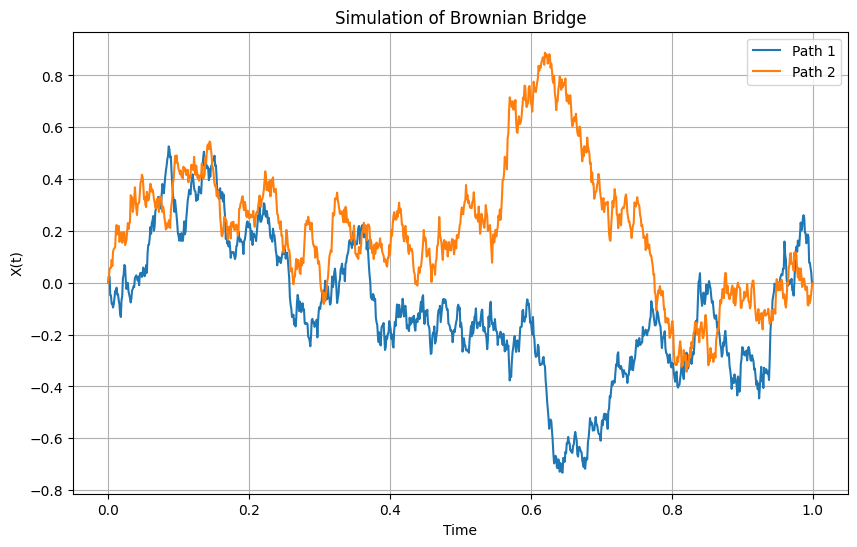

In [112]:
# (c) Construct the simulation of two paths of X
# Plot the two paths of X
plt.figure(figsize=(10, 6))
plt.plot(time_steps, X_t[0], label="Path 1")
plt.plot(time_steps, X_t[1], label="Path 2")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.legend()
plt.title("Simulation of Brownian Bridge")
plt.grid(True)
plt.show()


### 1.9.10 FIRST PASSAGE OF A BARRIER

Suppose there is a barrier situated at a positive level L. The time at which a Brownian motion first reaches this barrier is a random variable, which will be denoted $T_L$. This time is called the first passage time or hitting time. The event $T_L \leq t$ says that the barrier (Figure A.7) was reached by no later than time $t$. Its probability distribution $P[T_L \leq t]$ will now be derived.

In order to make use of the known probability distribution of $B(t)$, the probability distribution of $T_L$ is computed by considering the probability distribution of $B(t) \geq L$, which is the event that the position of the Brownian motion at time $t$ is above $L$, and conditioning on whether or not $T_L \leq t$. The events $T_L \leq t$ and $T_L > t$ are mutually exclusive, and there is no other possibility, so $P[B(t) \geq L]$ can be written as:

$$
P[B(t) \geq L] = P[B(t) \geq L | T_L \leq t] P[T_L \leq t] + P[B(t) \geq L | T_L > t] P[T_L > t]
$$

where the condition is specified behind the vertical divider. But the event $B(t) \geq L$ that at time $t$ the motion is above the barrier can only have happened if $T_L \leq t. Thus the second term is zero. So $P[B(t) \geq L] = P[B(t) \geq L | T_L \leq t] P[T_L \leq t]. If the Brownian motion has reached the barrier at some time prior to $t$, then where is it at time $t? It can be either above the barrier, which is the event $B(t) \geq L$, or below the barrier, which is the event $B(t) < L$. The key observation now is that both events are equally likely. This symmetry gives $P[B(t) \geq L | T_L \leq t] = \frac{1}{2}$. Thus, $P[B(t) \geq L] = \frac{1}{2} P[T_L \leq t]$, and the probability of interest, $P[T_L \leq t]$, equals $2 P[B(t) \geq L]$. As $B(t)$ is normally distributed, the probability on the right can be readily written down as:

$$
P[B(t) \geq L] = \int_{x=L}^{\infty} \frac{1}{\sqrt{2\pi t}} \exp\left(-\frac{1}{2}\frac{x^2}{t}\right) dx
$$

There exists no closed form expression for this integral. Write it in terms of the standard normal density by the transformation $z = \frac{x}{\sqrt{t}}$. This gives:

$$
\int_{z=L/\sqrt{t}}^{\infty} \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{1}{2}z^2\right) dz
$$

The end result is:

$$
P[T_L \leq t] = 2 P[B(t) \geq L] = 2 \left(1 - N\left(\frac{L}{\sqrt{t}}\right)\right)
$$

In [9]:
# Define the parameters
t0 = 0
T = 2
N = 1000
n = 10000
L = 1.5
delta_t = (T - t0) / N

# Generate the time steps
time_steps = np.arange(t0, T, delta_t)

# Generate the increments
delta_B = np.random.normal(0, np.sqrt(delta_t), (n,N))

# Calculate the Brownian Motion
b_t = np.cumsum(delta_B, axis=1)

# Count the number of rows where at least one element is greater than L
num_rows_with_values_greater_than_L = np.sum(np.any(b_t > L, axis=1))

# Print proportions of rows which approximates the P[T_l<t]
print(f"Simulation probability of P[T_{L}<{T}] is : {num_rows_with_values_greater_than_L/n} ")

# Calculate P[T_L <= t]
probability_T_L_leq_t = 2 * (1 - sp.stats.norm.cdf(L / np.sqrt(T)))

print(f"Analytical probability :  {probability_T_L_leq_t}")

Simulation probability of P[T_1.5<2] is : 0.2814 
Analytical probability :  0.2888443663464848


### 1.9.11

Reflected Brownian motion Construct a simulation of a reflected
Brownian motion on a spreadsheet, and show this in
a chart together with the path of the corresponding Brownian
motion.

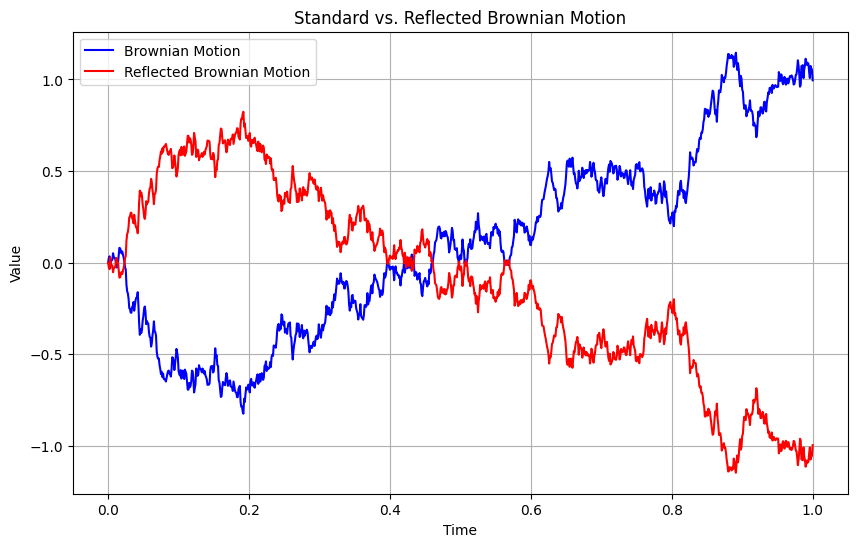

In [108]:
# Parameters
T = 1.0  # Total time
N = 1000  # Number of time steps
dt = T / N  # Time step size

# Generate time steps
t = np.linspace(0.0, T, N+1)

# Generate standard Brownian motion
W = np.cumsum(np.random.normal(0, np.sqrt(dt), N))
W = np.insert(W, 0, 0)  # Add the starting point (0) to the Brownian motion

# Reflect the Brownian motion at zero to create reflected Brownian motion
W_reflected = -W

# Plot both Brownian motions
plt.figure(figsize=(10, 6))
plt.plot(t, W, label="Brownian Motion", color='blue')
plt.plot(t, W_reflected, label="Reflected Brownian Motion", color='red')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.title("Standard vs. Reflected Brownian Motion")
plt.grid(True)
plt.show()

### 1.9.12

Brownian motion variation

(a) Design a program to compute the first variation, quadratic
variation, and third variation of the differentiable ordinary
function in Figure 1.16 over x ∈ [0, 1], initially partitioned
into n = 2000 steps, with successive doubling to 1024000
steps

(b) Copy the program of (a) and save it under another name.
Adapt it to simulate the first variation, quadratic variation,
and third variation of Brownian motion

In [24]:
# A)
# Define the function f(x)
def f(x, n):
    result = 0
    for i in range(n):
        result += np.sin(3 ** i * x) / (2 ** i) # this could be done with matrix for faster computation
    return result

# Initialize parameters
n_values = np.array([2000, 4000, 8000, 16000, 32000, 64000, 128000, 1024000, 10240000])
for n in n_values:
    x_values = np.linspace(0,1,n)
    dx = x_values[1]-x_values[0]
    # Calculate array of values:
    f_values = f(x_values, 20)

    # Calculate differences
    diff_f_values = np.diff(f_values)

    # All variations
    first_variation = np.sum(np.abs(diff_f_values))
    second_variation = np.sum(diff_f_values**2)
    third_variation = np.sum(np.abs(diff_f_values**3))
    print(f"{n}     {dx}        {first_variation}        {second_variation}        {third_variation}")



2000     0.0005002501250625312        16.065570069881705        0.2018737681138963        0.0031915691970281165
4000     0.00025006251562890725        19.389754751602815        0.14836502089771603        0.0014410812514925643
8000     0.00012501562695336918        26.333098296082447        0.13471694180639798        0.0008596485658292618
16000     6.250390649415588e-05        33.416469393303984        0.11044619050344748        0.00046167417337740263
32000     3.125097659301853e-05        41.66598656321425        0.08490197548177844        0.00021809524555375142
64000     1.5625244144439756e-05        57.3504593160341        0.07996750885928852        0.0001390394571040595
128000     7.81256103563309e-06        69.46992702592007        0.0598383257839229        6.558353652661938e-05
1024000     9.765634536752477e-07        150.23029806999966        0.034807385055069986        1.0263024055439247e-05
10240000     9.765625953674409e-08        349.1288405538244        0.018889004728806575 

In [31]:
# B)
# Define the parameters
def brownian_paths(T, N_steps, n_paths):

    delta_t = T / N_steps

    # Generate the increments
    delta_B = np.random.normal(0, np.sqrt(delta_t), (n_paths,N_steps))

    # Calculate the Brownian Motion
    b_t = np.cumsum(delta_B, axis=1)

    return b_t

T = 1
n = 1

# Initialize parameters
N_values = np.array([2000, 4000, 8000, 16000, 32000, 64000, 128000, 1024000, 10240000])

for N in n_values:
    # Generate the time steps
    time_steps = np.linspace(0, T, N)

    b_values = brownian_paths(T, N, n)
    dx = time_steps[1]-time_steps[0]

    # Calculate differences
    diff_f_values = np.diff(b_values)

    # All variations
    first_variation = np.sum(np.abs(diff_f_values))
    second_variation = np.sum(diff_f_values**2)
    third_variation = np.sum(np.abs(diff_f_values**3))
    print(f"{N}     {dx}        {first_variation}        {second_variation}        {third_variation}")



2000     0.0005002501250625312        36.39445182153855        1.0231642132904568        0.0363444327781965
4000     0.00025006251562890725        50.059390154056075        0.9938919603837919        0.025250781598401772
8000     0.00012501562695336918        72.09017303234148        1.0207379465530027        0.01840738854392588
16000     6.250390649415588e-05        101.84399248613369        1.017293734917636        0.012861414754576497
32000     3.125097659301853e-05        142.3454018425401        0.995157413623204        0.008840601598109834
64000     1.5625244144439756e-05        201.3854854052727        0.9927629608246077        0.006203880492618748
128000     7.81256103563309e-06        285.3050610406808        0.9997930045044044        0.004454706780267858
1024000     9.765634536752477e-07        807.5099198033254        1.0003437320002881        0.0015771044744918366
10240000     9.765625953674409e-08        2553.154108832844        0.9998749120708025        0.00049851588805087